# 自己练习
看看到底各类聚类算法能不能很好的将以下这个带有标签的数据，按照属性进行聚类，最终和实际的“类别进行比较”

## step1:数据处理
利用ai对原始数据进行提取，对原来的图片表格数据进行提取

In [4]:
import pandas as pd
from sklearn.metrics import accuracy_score

# 手动数字化表格内容
data = {
    "动力": ["一般","一般","很强","一般","一般","一般","一般","一般","很强","很弱"],
    "意愿": ["否","否","是","否","否","是","是","是","是","否"],
    "兴趣": ["否","是","是","否","否","否","是","是","是","否"],
    "时间": ["有","无","有","有","无","无","有","有","有","无"],
    # "类别": ["否","否","是","否","否","否","是","是","是","否"]
}

# 转换规则：
# "动力" -> 一般=0.5, 很强=1, 很弱=0
# "想提升能力","有兴趣","时间","类别" -> 是=1, 否/无=0, 有=1
mapping_dongli = {"一般":0.5, "很强":0.8, "很弱":0.2}
mapping_bool = {"是":1, "否":0, "有":1, "无":0}

df = pd.DataFrame(data)

df["动力"] = df["动力"].map(mapping_dongli)
df["意愿"] = df["意愿"].map(mapping_bool)
df["兴趣"] = df["兴趣"].map(mapping_bool)
df["时间"] = df["时间"].map(mapping_bool)
# df["类别"] = df["类别"].map(mapping_bool)

print(df)
# import caas_jupyter_tools
# caas_jupyter_tools.display_dataframe_to_user("数字化后的表格", df)


    动力  意愿  兴趣  时间
0  0.5   0   0   1
1  0.5   0   1   0
2  0.8   1   1   1
3  0.5   0   0   1
4  0.5   0   0   0
5  0.5   1   0   0
6  0.5   1   1   1
7  0.5   1   1   1
8  0.8   1   1   1
9  0.2   0   0   0


## step2:
利用Kmeans、DBSCAN、means-shift进行聚类

### Kmeans：

In [ ]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2, random_state=0)
kmeans.fit(df)

In [6]:
kmeans.predict(df)

array([0, 0, 1, 0, 0, 0, 1, 1, 1, 0], dtype=int32)

In [5]:

print(kmeans.labels_)

[0 0 1 0 0 0 1 1 1 0]


C:\Users\38473\miniconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


#### hopkins_statistic算法，可以用来衡量无标签数据的聚合趋势，在聚类之前难道不应应该首先对数据的“聚合程度”进行量化，看是否有聚合的必要
#### 其中该返回值值越接近1，则数据越Aggregate（聚合）
#### 0.5 则说明为随机分布
#### 0 则说明数据为网格分布

In [ ]:
import numpy as np

def hopkins_statistic(X, m=None, random_state=None):
    """
    X: ndarray (n_samples, n_features)
    m: number of sample points to use (default: min( n_samples//2, 50 ))
    return: Hopkins statistic (float)
    """
    rng = np.random.RandomState(random_state)
    n, d = X.shape
    if m is None:
        m = max(10, min(n//2, 50))
    # 1) 随机选 m 个原始点（索引）
    idx = rng.choice(np.arange(n), size=m, replace=False)
    X_m = X[idx]

    # 2) 为每个随机点在 X 中查找最近邻（不包括自己）
    nbrs = NearestNeighbors(n_neighbors=2).fit(X)
    distances_real, _ = nbrs.kneighbors(X_m, n_neighbors=2)  # 第一列就是点自己距离0
    w = distances_real[:, 1]  # 距离最近的其他真实点

    # 3) 在每个维度的范围内生成 m 个均匀随机点（bounding box）
    mins = X.min(axis=0)
    maxs = X.max(axis=0)
    U = rng.uniform(mins, maxs, size=(m, d))

    # 4) 计算每个随机点到原始数据最近点的距离
    nbrs_all = NearestNeighbors(n_neighbors=1).fit(X)
    u, _ = nbrs_all.kneighbors(U, n_neighbors=1)
    u = u.ravel()

    H = u.sum() / (u.sum() + w.sum())
    return H

hopkins_statistic(df)

In [2]:
from sklearn import datasets
from pyclustertend import hopkins
from sklearn.preprocessing import scale

X = scale(datasets.load_iris().data)
score = hopkins(X, 150)
print(score)

0.1739064214618207


# 对示例数据使用决策树分析一下

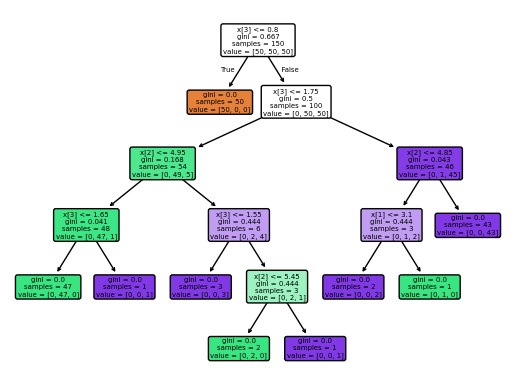

In [28]:
from sklearn.datasets import load_iris
from sklearn.metrics import accuracy_score
from sklearn.tree import plot_tree
from sklearn import tree


import matplotlib.pyplot as plt
iris = load_iris()
X, y = iris.data, iris.target
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X,y)

# print(accuracy_score(y, clf.predict(X)))

# tree.plot_tree(clf)

plot_tree(clf,
          # feature_names=['x1', 'x2', 'x3'],  # 替换为您的特征名
          # class_names=['Class 0', 'Class 1'],  # 替换为您的类别名
          filled=True,  # 填充节点颜色
          rounded=True,  # 圆角节点
          fontsize=5)
plt.show()

# test KNN algotithm in <mark>IRIS data</mark>

## Initial data processing
get data

Split data of train and test

In [5]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from umap import UMAP


from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['SimHei']  # 设置中文字体
plt.rcParams['axes.unicode_minus'] = False    # 正常显示负
import plotly.express as px

import numpy as np

X,y = load_iris(return_X_y= True)

X_train,X_val,y_train,y_val = train_test_split(X, y, test_size=1/3, random_state=818)


In [11]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
# 假设您已经导入了所有的 Pipeline 和预处理器
# from sklearn.preprocessing import StandardScaler
# from sklearn.decomposition import PCA
# from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
# import umap
# from sklearn.pipeline import Pipeline
# from sklearn.neighbors import KNeighborsClassifier

def run_evaluation():
    """
    根据给定的随机种子 i (random_state) 运行一次评估。

    参数:
        i (int): 随机种子，用于 train_test_split。
        X, y: 原始数据和标签。
        pipeline_*: 预定义的 Pipeline 对象。

    返回:
        dict: 包含所有准确率和泛化差距的结果字典。
    """

    # 1. 使用随机种子 i 进行数据划分 (训练集和验证集)
    # 注意：这里我们使用验证集 (X_val, y_val) 而非测试集，这是模型选择阶段的标准做法。
    X_train, X_val, y_train, y_val = train_test_split(
        X, y, test_size=0.3, random_state=i # i 作为随机种子
    )

    # 2. 重新拟合所有 Pipeline
    # 必须在每次循环中重新拟合，以确保它们只学习当前循环的 X_train。
    # 如果您的 Pipeline 内部已经包含了预处理步骤 (如 StandardScaler)，
    # 那么您只需要在 X_train 上 fit 即可。

    pipeline_std.fit(X_train, y_train)
    pipeline_std_Only_petal.fit(X_train[:, 2:4], y_train)
    pipeline_pca.fit(X_train, y_train)
    pipeline_lda.fit(X_train, y_train)
    pipeline_umap.fit(X_train, y_train)

    # 3. 计算预测结果
    result_std = pipeline_std.predict(X_val)
    result_std_Only_petal = pipeline_std_Only_petal.predict(X_val[:, 2:4])
    result_pca = pipeline_pca.predict(X_val)
    result_lda = pipeline_lda.predict(X_val)
    result_umap = pipeline_umap.predict(X_val)

    # 4. 初始化结果存储字典
    results = {}

    # 5. 计算准确率 (Validation Accuracy)
    results['KNN_std_准确率'] = accuracy_score(y_val, result_std)
    results['KNN_std_Only_petal_准确率'] = accuracy_score(y_val, result_std_Only_petal)
    results['KNN_PCA_准确率'] = accuracy_score(y_val, result_pca)
    results['KNN_LDA_准确率'] = accuracy_score(y_val, result_lda)
    results['KNN_umap_准确率'] = accuracy_score(y_val, result_umap)

    # 6. 计算泛化差距 (Generalization Gap: Train Score - Validation Score)
    # 注意：score 方法在 sklearn 中默认为准确率
    results['KNN_std_泛化差距'] = pipeline_std.score(X_train, y_train) - pipeline_std.score(X_val, y_val)
    results['KNN_std_Only_petal_泛化差距'] = pipeline_std_Only_petal.score(X_train[:, 2:4], y_train) - pipeline_std_Only_petal.score(X_val[:, 2:4], y_val)
    results['KNN_PCA_泛化差距'] = pipeline_pca.score(X_train, y_train) - pipeline_pca.score(X_val, y_val)
    results['KNN_LDA_泛化差距'] = pipeline_lda.score(X_train, y_train) - pipeline_lda.score(X_val, y_val)
    results['KNN_umap_泛化差距'] = pipeline_umap.score(X_train, y_train) - pipeline_umap.score(X_val, y_val)


    # 7. 计算F1分数并更新结果字典
    results['KNN_std_F1_Score'] = f1_score(y_val, result_std, average='weighted')
    results['KNN_std_Only_petal_F1_Score'] = f1_score(y_val, result_std_Only_petal, average='weighted')
    results['KNN_PCA_F1_Score'] = f1_score(y_val, result_pca, average='weighted')
    results['KNN_LDA_F1_Score'] = f1_score(y_val, result_lda, average='weighted')
    results['KNN_umap_F1_Score'] = f1_score(y_val, result_umap, average='weighted')

    # 返回包含所有结果的字典
    return results

## 用于迭代和绘图的公共部分

In [13]:
all_results = []
# --- 设置参数 ---
NUM_ITERATIONS = 50
for i in range(NUM_ITERATIONS):
    result_dict = run_evaluation()
    result_dict['Iteration'] = i # 添加迭代次数作为索引
    all_results.append(result_dict)


df_results = pd.DataFrame(all_results)
print("数据转换完成。前 5 行数据:")
print(df_results.head())

accuracy_cols = [col for col in df_results.columns if '准确率' in col]
gap_cols = [col for col in df_results.columns if '泛化差距' in col]
f1_cols = [col for col in df_results.columns if 'F1_Score' in col]


数据转换完成。前 5 行数据:
   KNN_std_准确率  KNN_std_Only_petal_准确率  KNN_PCA_准确率  KNN_LDA_准确率  \
0     0.955556                0.977778     0.911111     0.955556   
1     0.933333                0.977778     0.844444     0.933333   
2     1.000000                0.977778     0.911111     0.955556   
3     0.977778                0.955556     0.888889     0.977778   
4     0.955556                0.955556     0.933333     0.955556   

   KNN_umap_准确率  KNN_std_泛化差距  KNN_std_Only_petal_泛化差距  KNN_PCA_泛化差距  \
0      0.977778      0.025397                -0.006349      0.031746   
1      0.955556      0.038095                -0.006349      0.098413   
2      0.977778     -0.038095                 0.003175      0.003175   
3      0.955556     -0.006349                 0.006349      0.063492   
4      0.933333      0.015873                -0.003175     -0.028571   

   KNN_LDA_泛化差距  KNN_umap_泛化差距  KNN_std_F1_Score  KNN_std_Only_petal_F1_Score  \
0      0.006349       0.022222          0.955556             

### 利用plotly绘制可交互的 动态图

In [14]:
# -------------------------------------------------------------
# 1. 绘制准确率折线图
# -------------------------------------------------------------

# 将准确率数据从“宽格式”转换为“长格式”
# Plotly Express 偏好长格式数据 (Long Format)
df_acc_long = df_results.melt(
    id_vars=['Iteration'],
    value_vars=accuracy_cols,
    var_name='模型',
    value_name='准确率'
)

fig_acc = px.line(
    df_acc_long,
    x='Iteration',
    y='准确率',
    color='模型',
    title='不同模型在50次循环中的验证准确率变化',
    labels={'Iteration': '随机数/迭代次数', '准确率': '准确率 (Validation Accuracy)'}
)

# 增加交互性，例如悬停时显示更多信息
fig_acc.update_traces(mode='lines+markers')

# -------------------------------------------------------------
# 2. 绘制泛化差距折线图
# -------------------------------------------------------------

# 将泛化差距数据从“宽格式”转换为“长格式”(Long Format)
df_gap_long = df_results.melt(
    id_vars=['Iteration'],
    value_vars=gap_cols,
    var_name='模型',
    value_name='泛化差距'
)

fig_gap = px.line(
    df_gap_long,
    x='Iteration',
    y='泛化差距',
    color='模型',
    title='不同模型在50次循环中的泛化差距变化 (Train Acc - Val Acc)',
    labels={'Iteration': '随机数/迭代次数', '泛化差距': '泛化差距'}
)

# 增加参考线：泛化差距目标是接近 0
fig_gap.add_hline(y=0, line_dash="dash", line_color="red", annotation_text="理想泛化差距 (0)", annotation_position="bottom right")

fig_gap.update_traces(mode='lines+markers')
# -------------------------------------------------------------
# 2. 绘制F1_Score折线图
# -------------------------------------------------------------

# 将F1_Score数据从“宽格式”转换为“长格式”(Long Format)
df_f1_long = df_results.melt(
    id_vars=['Iteration'],
    value_vars=f1_cols,
    var_name='模型',
    value_name='F1_Score'
)

fig_f1 = px.line(
    df_f1_long,
    x='Iteration',
    y='F1_Score',
    color='模型',
    title='不同模型在50次循环中的F1_Score变化',
    labels={'Iteration': '随机数/迭代次数', 'F1_Score': 'F1_Score'}
)

# 增加参考线：F1_Score目标是接近 1
fig_f1.add_hline(y=1, line_dash="dash", line_color="blue", annotation_text="理想F1_Score (1)", annotation_position="bottom right")

fig_f1.update_traces(mode='lines+markers')
# -------------------------------------------------------------
# 3. 显示图表
# -------------------------------------------------------------
print("显示准确率图表 (Plotly)")
fig_acc.show()

print("显示泛化差距图表 (Plotly)")
fig_gap.show()

print("显示F1_Score图表 (Plotly)")
fig_f1.show()  # Updated to show the F1_Score chart

显示准确率图表 (Plotly)


显示泛化差距图表 (Plotly)


显示F1_Score图表 (Plotly)


#### 绘制经典的matplotlib的动态图

In [3]:

df_accuracy = df_results[['Iteration'] + accuracy_cols].set_index('Iteration')
df_gap = df_results[['Iteration'] + gap_cols].set_index('Iteration')

# --- 绘制准确率折线图 ---
plt.figure(figsize=(20, 20))

plt.subplot(3, 1, 1) # 第一个子图：准确率
df_accuracy.plot(ax=plt.gca())
plt.title(f'{NUM_ITERATIONS} 次循环的准确率变化')
plt.xlabel('随机数/迭代次数')
plt.ylabel('准确率 (Validation Accuracy)')
plt.grid(axis='y', linestyle='--')
plt.ylim(df_accuracy.min().min() * 0.95, 1.05) # 调整 Y 轴范围以更好地展示变化
plt.legend(title='模型', bbox_to_anchor=(1.05, 1), loc='upper left')

# --- 绘制泛化差距折线图 ---
plt.subplot(3, 1, 2) # 第二个子图：泛化差距
df_gap.plot(ax=plt.gca())
plt.title(f'{NUM_ITERATIONS} 次循环的泛化差距变化')
plt.xlabel('随机数/迭代次数')
plt.ylabel('泛化差距 (Train Acc - Val Acc)')
plt.axhline(0, color='r', linestyle='--') # 标记零线
plt.grid(axis='y', linestyle='--')
plt.legend(title='模型', bbox_to_anchor=(1.05, 1), loc='upper left')

#--- 绘制布局 ---
plt.tight_layout(rect=[0, 0, 0.9, 1]) # 调整布局，防止图例重叠
plt.show()

# --- 额外信息：计算平均性能 ---
print("\n--- 50 次循环的平均性能 ---")
print(df_results.drop(columns=['Iteration']).mean().to_frame(name='平均值'))

NameError: name 'df_results' is not defined

## test KNN in iris data.Only use orginal data

In [166]:

knn_classifier = KNeighborsClassifier(n_neighbors=3)
knn_classifier.fit(X_train, y_train)


result_knn1 = pd.DataFrame(knn_classifier.predict(X_val))

print("KNN分类准确率:", accuracy_score(y_val, result_knn1))
manual_comp_reslut1 = pd.concat([result_knn1, pd.DataFrame(y_val)], axis=1)

KNN分类准确率: 0.94


## used “pipeline” feature

In [8]:
pipeline_std = Pipeline([
    ('Scaler', StandardScaler()),
    ('KNN', KNeighborsClassifier(n_neighbors=2))
])

pipeline_std_Only_petal = Pipeline([
    ('Scaler', StandardScaler()),
    ('KNN', KNeighborsClassifier(n_neighbors=2))
])


pipeline_pca = Pipeline([
    ('Scaler', StandardScaler()),
    ('PCA', PCA(n_components=2)),
    ('KNN', KNeighborsClassifier(n_neighbors=2))
])

pipeline_lda = Pipeline([
    ('Scaler', StandardScaler()),
    ('lda', LinearDiscriminantAnalysis(n_components=2)),
    ('KNN', KNeighborsClassifier(n_neighbors=2))
])

pipeline_umap = Pipeline([
    ('Scaler', StandardScaler()),
    ('umap', UMAP(n_components=2)),
    ('KNN', KNeighborsClassifier(n_neighbors=2))
])

####训练拟合#####

pipeline_std.fit(X_train, y_train)
pipeline_std_Only_petal.fit(X_train[:, 2:4], y_train)
pipeline_pca.fit(X_train, y_train)
pipeline_lda.fit(X_train, y_train)
pipeline_umap.fit(X_train, y_train)

####预测#####
result_std = pd.DataFrame(pipeline_std.predict(X_val))
result_std_Only_petal = pd.DataFrame(pipeline_std_Only_petal.predict(X_val[:, 2:4]))
result_pca = pd.DataFrame(pipeline_pca.predict(X_val))
result_lda = pd.DataFrame(pipeline_lda.predict(X_val))
result_umap = pd.DataFrame(pipeline_umap.predict(X_val))

###评价#####
print("KNN_std_准确率:", accuracy_score(y_val, result_std))
print("KNN_std_Only_petal_准确率:", accuracy_score(y_val, result_std_Only_petal))
print("KNN_PCA_降维后的准确率:", accuracy_score(y_val, result_pca))
print("KNN_LDA_降维后的准确率:", accuracy_score(y_val, result_lda))
print("KNN_umap_降维后的准确率:", accuracy_score(y_val, result_umap))

print("==========")
print("KNN_std_泛化差距：", pipeline_std.score(X_train, y_train)-pipeline_std.score(X_val, y_val))
print("KNN_std_Only_petal_泛化差距：", pipeline_std_Only_petal.score(X_train[:, 2:4], y_train)-pipeline_std_Only_petal.score(X_val[:, 2:4], y_val))
print("KNN_PCA_降维后的泛化差距：", pipeline_pca.score(X_train, y_train)-pipeline_pca.score(X_val, y_val))
print("KNN_LDA_降维后的泛化差距：", pipeline_lda.score(X_train, y_train)-pipeline_lda.score(X_val, y_val))
print("KNN_umap_降维后的泛化差距：", pipeline_umap.score(X_train, y_train)-pipeline_umap.score(X_val, y_val))



KNN_std_准确率: 0.9
KNN_std_Only_petal_准确率: 0.94
KNN_PCA_降维后的准确率: 0.86
KNN_LDA_降维后的准确率: 0.92
KNN_umap_降维后的准确率: 0.9
KNN_std_泛化差距： 0.08999999999999997
KNN_std_Only_petal_泛化差距： 0.020000000000000018
KNN_PCA_降维后的泛化差距： 0.09999999999999998
KNN_LDA_降维后的泛化差距： 0.07999999999999996
KNN_umap_降维后的泛化差距： 0.09999999999999998


### test KNN method. Use standard data

In [154]:

pipeline_std = Pipeline([
    ('Scaler', StandardScaler()),
    ('KNN', KNeighborsClassifier(n_neighbors=3))
])

#########开始构建knn#######
pipeline_std.fit(X_train, y_train)
############开始预测#######

result_knn2 = pd.DataFrame(pipeline_std.predict(X_val))
print("KNN分类准确率:", accuracy_score(y_val, result_knn2))
manual_comp_reslut2 = pd.concat([result_knn2, pd.DataFrame(y_val)], axis=1)
manual_comp_reslut2.columns = ['predict', 'y_val']


KNN分类准确率: 0.98


### test KNN method. Use standard data and <mark>PCA</mark>

In [168]:
pipeline_pca = Pipeline([
    ('Scaler', StandardScaler()),
    ('PCA', PCA(n_components=2)),
    ('KNN', KNeighborsClassifier(n_neighbors=3))
])

#########开始构建knn#######
pipeline_pca.fit(X_train, y_train)
############开始预测#######

result_knn3 = pd.DataFrame(pipeline_pca.predict(X_val))
print("KNN_标准化_降维后的准确率:", accuracy_score(y_val, result_knn3))
manual_comp_reslut3 = pd.concat([result_knn3, pd.DataFrame(y_val)], axis=1)
manual_comp_reslut3.columns = ['predict', 'y_val']

KNN_标准化_降维后的准确率: 0.86


### test KNN method <mark>manual select last two columns

In [156]:

knn_classifier = KNeighborsClassifier(n_neighbors=3)

knn_classifier.fit(X[:, -2:], y)

result_knn4 = pd.DataFrame(knn_classifier.predict(X_val[:, -2:]))

print("KNN分类准确率:", accuracy_score(y_val, result_knn4))
manual_comp_reslut4 = pd.concat([result_knn4, pd.DataFrame(y_val)], axis=1)


KNN分类准确率: 1.0


### test KNN method.Used UMAP for data processing

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score



X_train, X_test, y_train, y_test = train_test_split(X_umap, y, test_size=0.3, random_state=42)
model = KNeighborsClassifier(n_neighbors=3)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))

test logistic regression

In [23]:
from sklearn.linear_model import LinearRegression,LogisticRegression

LR_model = LogisticRegression()
LR_model.fit(X, y)
result_LR = pd.DataFrame(LR_model.predict(X))
print("逻辑回归分类准确率:", accuracy_score(y, result_LR))

逻辑回归分类准确率: 0.9733333333333334


C:\Users\38473\.conda\envs\ML_learn_310\lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
